In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
Data_Set = pd.read_excel('Sample SuperStore.xlsx')

# Display the first few rows and summary statistics
print(Data_Set.head())

print(Data_Set.describe())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2018-152156 2018-11-08 2018-11-11    Second Class    CG-12520   
1     2.0  CA-2018-152156 2018-11-08 2018-11-11    Second Class    CG-12520   
2     3.0  CA-2018-138688 2018-06-12 2018-06-16    Second Class    DV-13045   
3     4.0  US-2017-108966 2017-10-11 2017-10-18  Standard Class    SO-20335   
4     5.0  US-2017-108966 2017-10-11 2017-10-18  Standard Class    SO-20335   

     Customer Name    Segment Country/Region             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code     Region       Product ID         Category Sub-Category  \
0     42420.0  NorthEAST  FUR

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
# Handle missing values
#Missing values

missing_values= Data_Set.isna().sum()
print(missing_values)

#Cleaning data_set by removing missing values

Data_Set_Clean = Data_Set.dropna()


Row ID             1
Order ID           1
Order Date         1
Ship Date          1
Ship Mode          1
Customer ID        1
Customer Name      1
Segment            1
Country/Region     1
City               1
State              1
Postal Code       12
Region             0
Product ID         1
Category           1
Sub-Category       1
Product Name       1
Sales              1
Quantity           1
Discount           1
Profit             1
dtype: int64


In [6]:
#Check missing values for clean data set
print(Data_Set_Clean.isna().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [7]:
# Convert data types if necessary
#Check data types

print(Data_Set_Clean.dtypes)

Row ID                   float64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                 float64
Discount                 float64
Profit                   float64
dtype: object


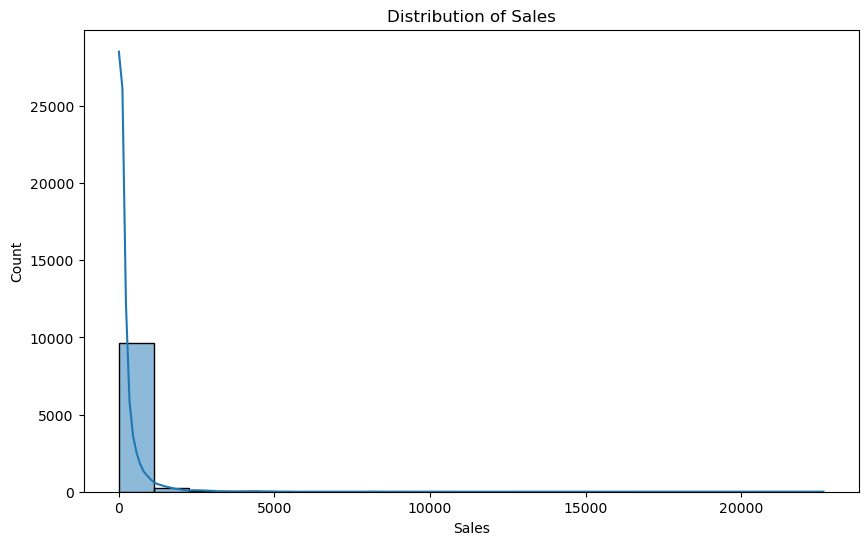

In [11]:
# Univariate analysis
plt.figure(figsize=(10,6))
sns.histplot(Data_Set_Clean['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.show()

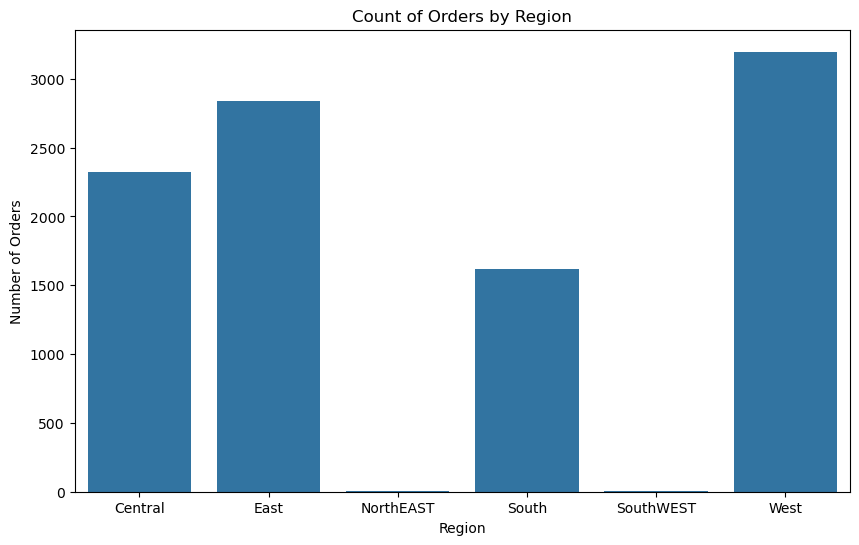

In [16]:
##Grouping orders by region
orders_by_region = Data_Set_Clean.groupby('Region')['Order ID'].count().reset_index()
orders_by_region.columns = ['Region', 'Order Count']  # Renaming columns for clarity

#Ploting bar chart for orders by region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Order Count', data=orders_by_region)
plt.title('Count of Orders by Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.show()

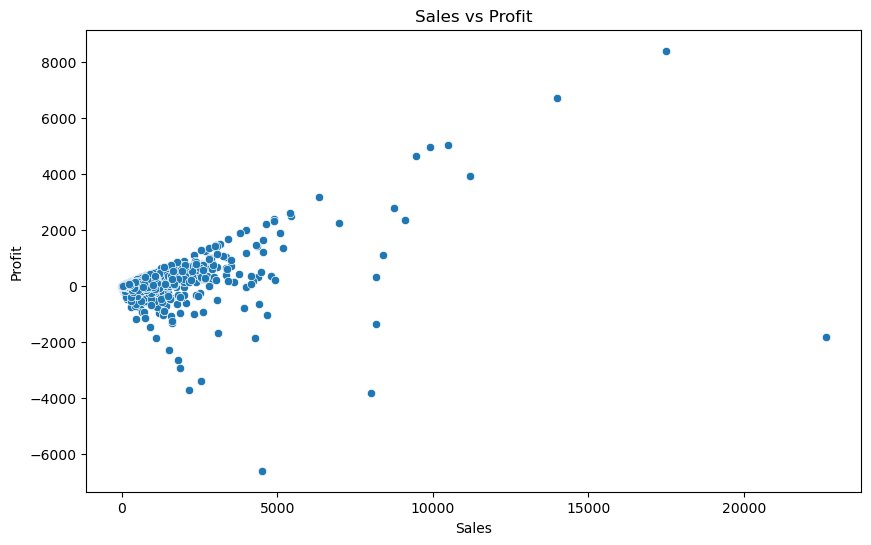

In [12]:
# Bivariate analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=Data_Set_Clean)
plt.title('Sales vs Profit')
plt.show()


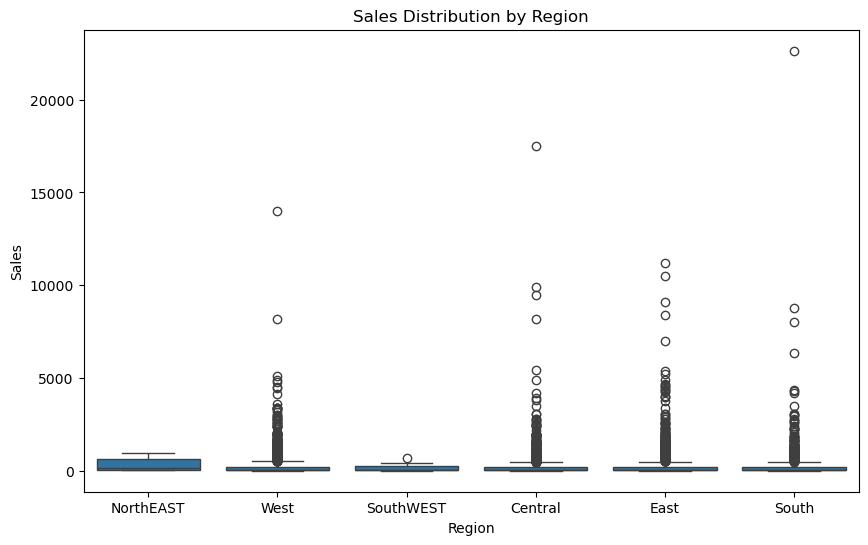

In [20]:


# Plotting the graph sales by region
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Sales', data=Data_Set_Clean)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


In [21]:
# Summary statistics for key variables
print(Data_Set_Clean[['Sales', 'Profit', 'Quantity']].describe())

              Sales       Profit     Quantity
count   9983.000000  9983.000000  9983.000000
mean     229.216818    28.463592     3.788741
std      621.909610   234.122107     2.223566
min        0.444000 -6599.978000     1.000000
25%       17.280000     1.727100     2.000000
50%       54.384000     8.643600     3.000000
75%      209.905000    29.315200     5.000000
max    22638.480000  8399.976000    14.000000


In [22]:
# Grouped statistics
sales_by_region = Data_Set_Clean.groupby('Region')['Sales'].sum()
print(sales_by_region)

Region
Central      500502.6568
East         669851.8700
NorthEAST      2037.3255
South        389732.5075
SouthWEST      1438.3020
West         724708.8285
Name: Sales, dtype: float64
